In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path = r'C:\Users\firoj\OneDrive\Desktop\thesis_test\Thesis_test_01\Final_data'
os.chdir(path)

In [3]:
df = pd.read_csv('main_data.csv')
df.head()

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_m,sig_m,wave_tp,wind_m/s,sine,cosine,target
0,01.05.2023 07:08,210090000.0,88.0,8.545379,53.56142,0.0,110.0,53.49468,8.504,7909.105180,1.0,5.02,0.3666,356.8,3.5,0.484810,-0.874620,27.00
1,01.05.2023 07:11,210090000.0,88.0,8.554007,53.55247,1150.0,112.0,53.49468,8.504,7226.372365,1.0,5.06,0.3575,347.8,3.1,0.500000,-0.866025,24.00
2,01.05.2023 07:14,210090000.0,88.0,8.562378,53.54377,1110.0,111.0,53.49468,8.504,6685.145437,1.0,5.10,0.3716,359.2,1.3,0.484810,-0.874620,20.98
3,01.05.2023 07:17,210090000.0,88.0,8.567384,53.53481,1050.0,110.0,53.49468,8.504,6121.669271,1.0,5.14,0.3833,362.5,2.6,-0.052336,-0.998630,18.00
4,01.05.2023 07:20,210090000.0,88.0,8.562150,53.52593,1050.0,110.0,53.49468,8.504,5182.656801,1.0,5.18,0.3616,346.5,2.6,-0.681998,-0.731354,15.00


In [4]:
# Convert the date-time column to a datetime object with the specified format
df['ais_timestamp'] = pd.to_datetime(df['ais_timestamp'], format='%d.%m.%Y %H:%M')

# Convert the datetime object to a numeric representation, like Unix timestamp
df['ais_timestamp'] = df['ais_timestamp'].view('int64')

### Descriptive Statitics

In [5]:
df.describe()

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_m,sig_m,wave_tp,wind_m/s,sine,cosine,target
count,7.364500e+04,7.364500e+04,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.000000,73645.00000
mean,1.686335e+18,2.577245e+08,92.905886,8.655198,53.212529,406.956345,48.827225,53.207131,8.653637,6698.862462,0.973454,4.238739,0.654472,353.590866,4.994145,0.006838,0.055312,470.67207
std,1.227553e+15,7.582049e+07,42.127050,0.206935,0.342097,918.668010,41.850200,0.341591,0.217102,6682.288552,0.160754,1.894656,0.372933,70.185392,2.462850,0.613736,0.787551,682.39382
min,1.682925e+18,1.168452e+06,0.000000,8.473387,52.314200,0.000000,0.000000,52.306180,8.487362,0.000000,0.000000,1.050000,0.133200,188.200000,0.200000,-1.000000,-1.000000,0.00000
25%,1.685616e+18,2.115004e+08,80.000000,8.498510,53.078590,0.000000,0.000000,53.081600,8.496834,1898.099163,1.000000,2.900000,0.360100,297.500000,3.100000,-0.500000,-0.819152,26.98000
50%,1.686378e+18,2.446509e+08,85.000000,8.553785,53.304870,40.000000,58.000000,53.327040,8.506452,4429.119737,1.000000,4.180000,0.552600,363.900000,4.600000,0.000000,0.173648,87.00000
75%,1.687306e+18,2.611863e+08,89.000000,8.793780,53.514790,730.000000,83.000000,53.491720,8.784839,9338.833424,1.000000,6.010000,0.878300,409.100000,6.700000,0.515038,0.891007,705.00000
max,1.688168e+18,6.360228e+08,500.000000,9.220220,53.577660,44780.000000,320.000000,53.576440,9.219920,32254.486373,1.000000,7.510000,2.068000,557.400000,14.500000,1.000000,1.000000,2735.00000


### Missing Values 

In [6]:
df.isnull().sum()

ais_timestamp         0
vessel_mmsi           0
vessel_length         0
lon                   0
lat                   0
distance              0
speed                 0
destination_lat       0
destination_lon       0
remaining_distance    0
lock_status           0
water_level_m         0
sig_m                 0
wave_tp               0
wind_m/s              0
sine                  0
cosine                0
target                0
dtype: int64

### Correlation Analysis 

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,ais_timestamp,vessel_mmsi,vessel_length,lon,lat,distance,speed,destination_lat,destination_lon,remaining_distance,lock_status,water_level_m,sig_m,wave_tp,wind_m/s,sine,cosine,target
ais_timestamp,1.000000,0.002887,0.008910,-0.175811,0.078683,-0.020591,0.000227,0.079820,-0.177319,-0.023072,0.192306,-0.089511,-0.133084,-0.228071,-0.002569,-0.017137,-0.005524,0.012996
vessel_mmsi,0.002887,1.000000,0.223118,-0.235940,0.275363,-0.022287,-0.099585,0.256977,-0.249918,0.060249,0.059262,0.165576,0.065341,0.085334,0.006568,-0.023495,0.022223,0.134594
vessel_length,0.008910,0.223118,1.000000,-0.234478,0.209127,0.046409,0.076490,0.243809,-0.255349,0.148632,0.090182,0.191277,0.038006,0.022958,-0.010485,-0.031889,0.060105,0.028579
lon,-0.175811,-0.235940,-0.234478,1.000000,-0.827270,-0.088492,-0.074547,-0.815033,0.946551,-0.245509,-0.364154,-0.576009,-0.013345,0.003315,0.013176,0.090760,0.007453,-0.039477
lat,0.078683,0.275363,0.209127,-0.827270,1.000000,-0.012428,-0.151013,0.976679,-0.826379,0.129722,0.264550,0.442909,0.039024,0.017302,-0.047139,-0.064638,0.045399,0.222502
distance,-0.020591,-0.022287,0.046409,-0.088492,-0.012428,1.000000,0.393664,-0.002751,-0.046418,0.108560,0.068480,0.067875,-0.027463,0.001560,0.036457,0.002691,-0.049447,-0.250493
speed,0.000227,-0.099585,0.076490,-0.074547,-0.151013,0.393664,1.000000,-0.124874,0.023501,0.244239,0.056640,0.105439,-0.054739,-0.019977,0.089242,0.118288,-0.131588,-0.594964
destination_lat,0.079820,0.256977,0.243809,-0.815033,0.976679,-0.002751,-0.124874,1.000000,-0.858263,0.140961,0.276041,0.446561,0.040133,0.023596,-0.037272,-0.104175,0.151894,0.213095
destination_lon,-0.177319,-0.249918,-0.255349,0.946551,-0.826379,-0.046418,0.023501,-0.858263,1.000000,-0.191993,-0.359276,-0.560080,-0.022320,-0.008465,0.024416,0.185688,-0.100559,-0.105158
remaining_distance,-0.023072,0.060249,0.148632,-0.245509,0.129722,0.108560,0.244239,0.140961,-0.191993,1.000000,0.060688,0.255518,-0.008814,0.038344,0.011475,-0.114282,-0.027468,-0.065098


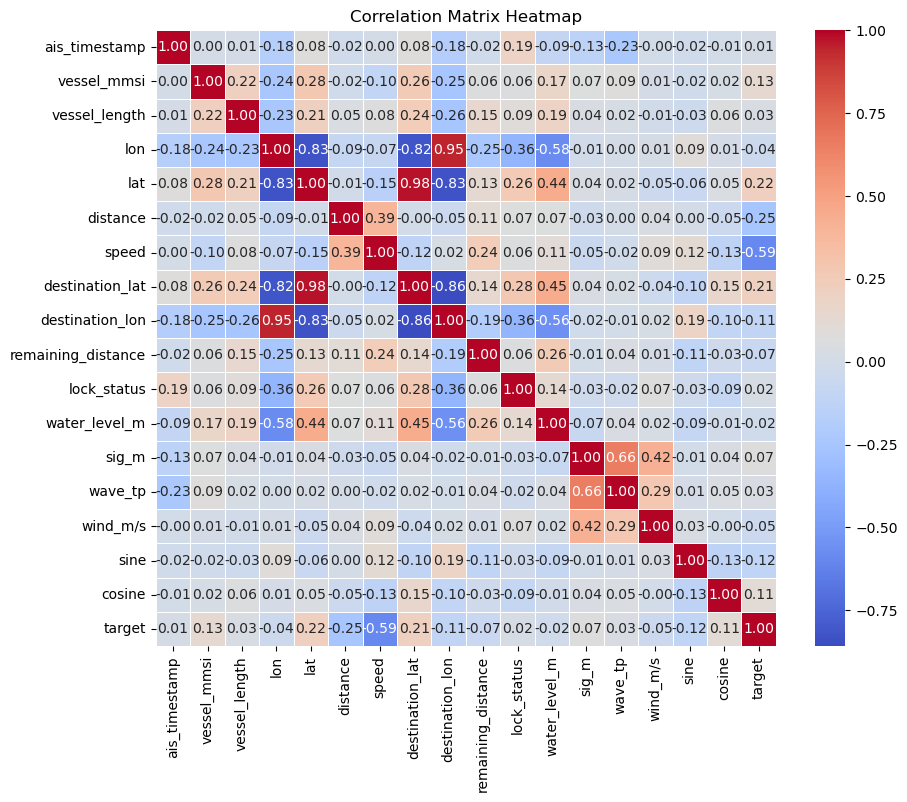

In [8]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data Distribution 

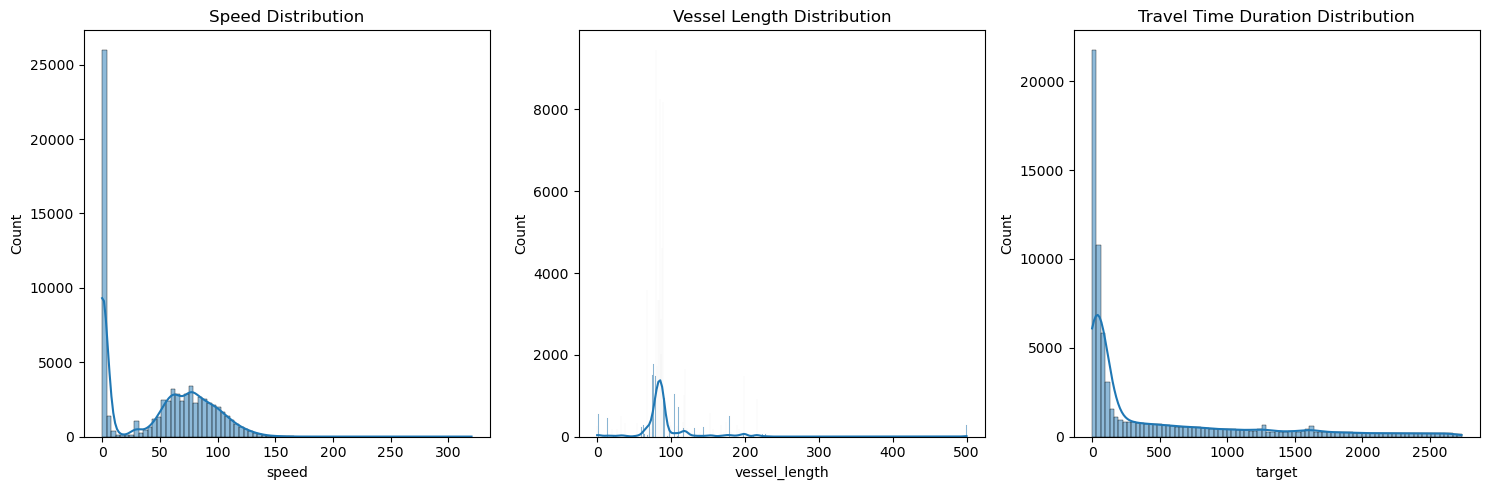

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 5))

# Distribution plot for 'speed'
plt.subplot(1, 3, 1)
sns.histplot(df['speed'], kde=True)
plt.title('Speed Distribution')

# Distribution plot for 'vessel length'
plt.subplot(1, 3, 2)
sns.histplot(df['vessel_length'], kde=True)
plt.title('Vessel Length Distribution')

# Distribution plot for 'travel time duration'
plt.subplot(1, 3, 3)
sns.histplot(df['target'], kde=True)
plt.title('Travel Time Duration Distribution')

plt.tight_layout()
plt.show()

### Relationship Between Features

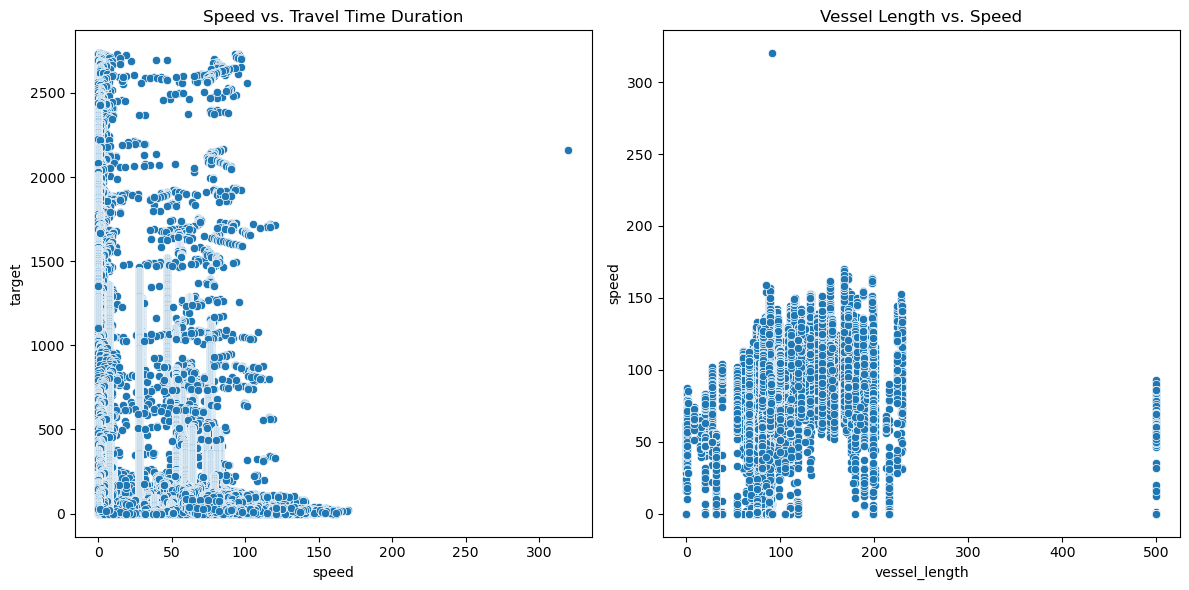

In [10]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Scatter plot for Speed vs. Travel Time Duration
plt.subplot(1, 2, 1)
sns.scatterplot(x='speed', y='target', data=df)
plt.title('Speed vs. Travel Time Duration')

# Scatter plot for Vessel Length vs. Speed
plt.subplot(1, 2, 2)
sns.scatterplot(x='vessel_length', y='speed', data=df)
plt.title('Vessel Length vs. Speed')

plt.tight_layout()
plt.show()

### Univariate Analysis

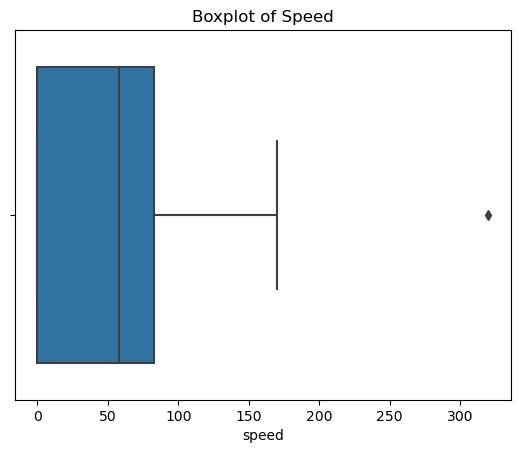

In [11]:
sns.boxplot(x=df['speed'])
plt.title('Boxplot of Speed')
plt.show()

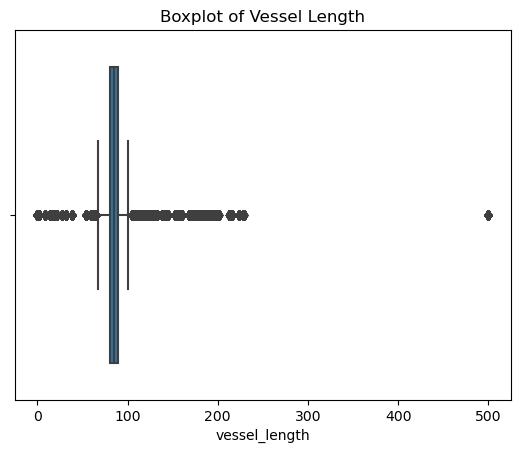

In [12]:
sns.boxplot(x=df['vessel_length'])
plt.title('Boxplot of Vessel Length')
plt.show()

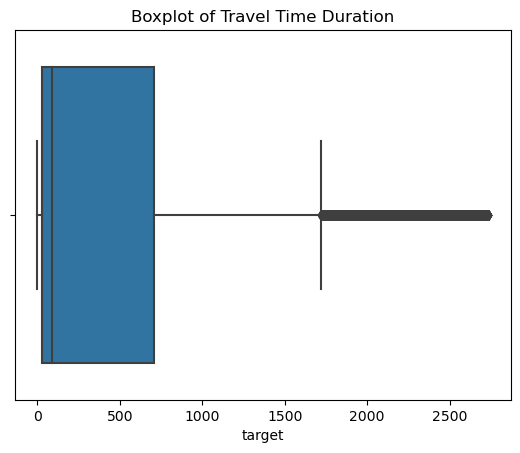

In [13]:
sns.boxplot(x=df['target'])
plt.title('Boxplot of Travel Time Duration')
plt.show()

### Bivariate Analysis

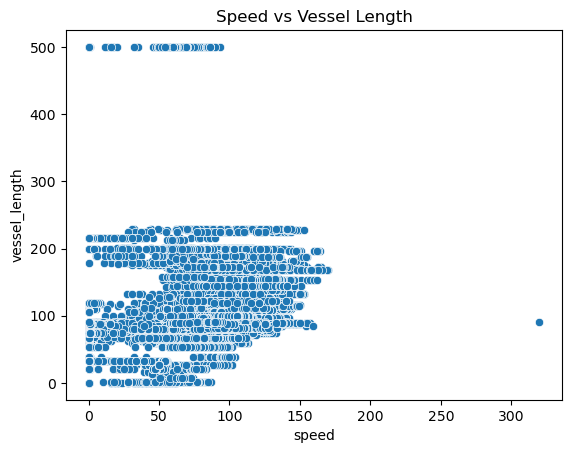

In [14]:
sns.scatterplot(x='speed', y='vessel_length', data=df)
plt.title('Speed vs Vessel Length')
plt.show()

In [15]:
sns.scatterplot(x='max_cm', y='sig_cm', data=df)
plt.title('max_cm vs sig_cm')
plt.show()

ValueError: Could not interpret value `max_cm` for parameter `x`

In [ ]:
sns.scatterplot(x='max_cm', y='turb_cm', data=df)
plt.title('max_cm vs turb_cm')
plt.show()

In [ ]:
sns.scatterplot(x='max_cm', y='tp', data=df)
plt.title('max_cm vs tp')
plt.show()

In [ ]:
sns.scatterplot(x='sig_cm', y='turb_cm', data=df)
plt.title('sig_sm vs turb_cm')
plt.show()

In [ ]:
sns.scatterplot(x='sig_cm', y='tp', data=df)
plt.title('sig_cm vs tp')
plt.show()

In [ ]:
sns.scatterplot(x='turb_cm', y='tp', data=df)
plt.title('turb_cm vs tp')
plt.show()

### Multivariate Analysis

In [ ]:
sns.pairplot(df[['speed', 'vessel_length', 'target']])
plt.show()